# Study of data reuse: Electrophysiological data of cortical layer 6 neurons and synaptically coupled neuronal pairs (v1)

In this notebook we will look more closely at the EBRAINS dataset "[Electrophysiological data of cortical layer 6 neurons and synaptically coupled neuronal pairs (v1)](https://search.kg.ebrains.eu/instances/5b55cc01-8eb2-48fa-967d-d0c6c2c0e67d)", contributed by  Dirk Feldmeyer from the Institute of Neuroscience and Medicine of Jülich, Germany.

As we can see from the dataset description,

<i>This dataset provides a electrophysiological characterisation of cortical neurons and synaptically coupled neuronal pairs that is essential to understand their functions in brain microcircuits. Electrophysiological data were collected by using single or dual patch-clamp recordings from primary somatosensory (barrel) cortical layer 6 neurons in acute rat brain slices. "[Data Descriptor]"(https://search.kg.ebrains.eu/instances/5b55cc01-8eb2-48fa-967d-d0c6c2c0e67d).
    
This dataset forms part of the results reported in Yang, D., Günter, R., Qi, G., Radnikow, G., & Feldmeyer, D. (2020). Muscarinic and Nicotinic Modulation of Neocortical Layer 6A Synaptic Microcircuits Is Cooperative and Cell-Specific. *Cerebral cortex* (New York, N.Y. : 1991), **30**(6), 3528–3542. https://doi.org/10.1093/cercor/bhz324

In this notebook we will demonstrate how to access the data files and the metadata from this study, and how these data can be analysed and visualised, with the goal of reproducing some of the figures from the article. 

### Notes: 
Unable to open most files because in pxp format. Managed to reproduce some graphs from the xlsx files but lots of data is missing so impossible to reproduce everything 

impossible to open pxp files, tried with igor but unable to install it 

In [18]:
!git clone git://tremily.us/igor.git

Clonage dans 'igor'...
fatal: impossible de se connecter à tremily.us :
tremily.us[0: 67.168.82.248]: errno=Connexion terminée par expiration du délai d'attente



In [19]:
!pip install igor

ERROR: Exception:
Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/pip/_internal/cli/base_command.py", line 186, in _main
    status = self.run(options, args)
  File "/usr/lib/python3/dist-packages/pip/_internal/commands/install.py", line 357, in run
    resolver.resolve(requirement_set)
  File "/usr/lib/python3/dist-packages/pip/_internal/legacy_resolve.py", line 177, in resolve
    discovered_reqs.extend(self._resolve_one(requirement_set, req))
  File "/usr/lib/python3/dist-packages/pip/_internal/legacy_resolve.py", line 333, in _resolve_one
    abstract_dist = self._get_abstract_dist_for(req_to_install)
  File "/usr/lib/python3/dist-packages/pip/_internal/legacy_resolve.py", line 270, in _get_abstract_dist_for
    skip_reason = self._check_skip_installed(req)
  File "/usr/lib/python3/dist-packages/pip/_internal/legacy_resolve.py", line 228, in _check_skip_installed
    req_to_install.check_if_exists(self.use_user_site)
  File "/usr/lib/python3/dist-packages/

### Fig 5d

In [1]:
#prepare the notebook
!pip install seaborn
!pip install pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
!pip install openpyxl
import openpyxl
import numpy as np
from statistics import mean
from matplotlib import style
import scipy.stats as stats
from openpyxl import Workbook
from openpyxl.chart import (
    ScatterChart,
    Reference,
    Series,)

/home/isaurebotherel/.local/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [28]:
!pip install --upgrade xlrd

     |████████████████████████████████| 96 kB 2.7 MB/s  eta 0:00:01


In [134]:
#data presentation
import openpyxl
df=pd.read_excel(" Ach effec on L6A PSP.xls")
df


,Experiment,Morphology comment,Amp. control,Amp. Ach30µM,Amp. washout,PPR control,PPR Ach 30,PPR Washout,Decay control,Decay Ach30,...,Rise time Washout,Latency control,Latency Ach30,Latency washout,CV control,CV Ach30,CV washout,Failure CTR,Failure Ach30,Failure washout
0,NaN,NaN,(mV),(mV),(mV),NaN,NaN,NaN,(ms),(ms),...,(ms),(ms),(ms),(ms),NaN,NaN,NaN,(%),(%),(%)
1,E-E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BC 30072015 CD,CC-CC,0.137,0.00056,-,-,-,-,-,-,...,-,-,-,-,1.484,1.4765,-,58.5,85.454545,-
3,BC 01092015 AB,CC-CC,0.676,0.259,0.455,0.92,1.56,1.04,26.6,32.1,...,1.08,1.91,1.84,2.07,0.458,0.651,0.571,3,73.7,14
4,BC 07092015 AB,CC-CC,0.559,0.224,0.372,0.63,0.83,0.59,29.9,18.6,...,1.45,0.94,2.09,2,0.563,0.556,0.579,6.67,0,16
5,BC 07092015 AB2,CC-CC,0.264,0.10096,-,0.587,1.11,-,29.76,4.496,...,-,1.38,2.4142,-,0.525,0.545,-,33.33,70,-
6,BC 15092015 AB,CC-CC,0.156,0.111,0.148,0.9,1.88,0.84,63.3,29.3,...,0.99,0.88,0.78,0.74,0.644,0.871,0.754,23.3,60,26.5
7,BC 21092015 CD,CC-CC,0.156,0.032,-,1,1.99,-,23.3,35,...,-,-,-,-,-,-,-,63.33,75,-
8,BC 28092015 EF,CC-CC,0.397,0.261,0.347,0.65,0.63,0.7,17.1,42.9,...,1.69,1.61,1.55,1.37,0.336,0.583,0.345,0,25,4
9,BC 20102015 KL,CC-CC,0.435,0.372,0.286,-,-,-,33.7,26.6,...,1.35,1.76,1.65,1.7,0.591,0.78,0.761,8.3,31.6,34


In [140]:
df2=pd.read_excel(" Ach effec on L6A PSP.xls", sheet_name=['Ex.-to-FS or non-FS'])
print(df2)

{'Ex.-to-FS or non-FS':          Experiment Morphology comment Amp.  control Amp. Ach30 Amp. washout  \
0               NaN                NaN          (mV)       (mV)         (mV)   
1               NaN                NaN           NaN        NaN          NaN   
2    BC 18082015 BC           CC-nonFS      0.074949    0.10899     0.060687   
3    BC 02092015 AB              CC-FS         1.981      1.275        1.875   
4    BC 23092015 CD              CC-FS         0.797      0.275        0.663   
..              ...                ...           ...        ...          ...   
120             NaN                  1        1.8337    0.65435     0.356847   
121             NaN                  1       0.48374     0.2513     0.519494   
122             NaN                NaN           NaN        NaN          NaN   
123             NaN                NaN      0.904503   0.523991          NaN   
124             NaN                NaN      0.904398   0.576056          NaN   

    PPR control

In [126]:
def get_std_dev(ls):
    n = len(ls)
    mean = sum(ls) / n
    var = sum((x - mean)**2 for x in ls) / n
    std_dev = var ** 0.5
    return std_dev


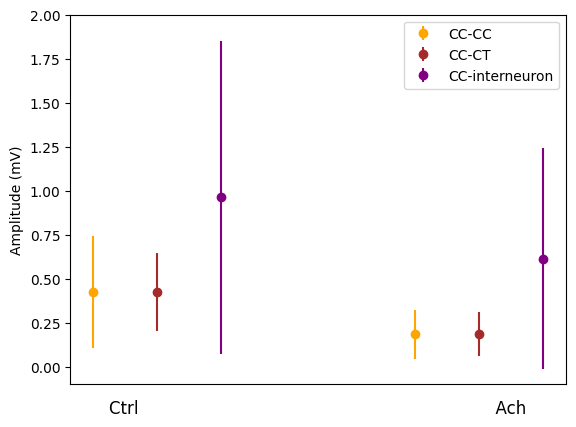

In [147]:
a=df['Amp.  control'][2:21]
b=df['Amp.  control'][21:27]
c=df['Amp. Ach30µM'][2:21]
b=df['Amp. Ach30µM'][21:27]
e=[0.07,1.98,0.8,0.53,2.34,0.06]
f=[0.11,1.28,0.28,0.3,1.68,0.04]
a_mean=np.mean(a)
b_mean=np.mean(a)
c_mean=np.mean(c)
d_mean=np.mean(c)
e_mean=np.mean(e)
f_mean=np.mean(f)
y = np.array([a_mean,c_mean])
y1=np.array([b_mean,d_mean])
y2=np.array([e_mean,f_mean])
e2=np.array([get_std_dev(e),get_std_dev(f)])
x= [1,1.5,] 
x1=[1.1,1.6]
x2=[1.2,1.7]
e = np.array([0.32,0.14])
e1=np.array([0.220,0.125])

plt.errorbar(x, y, e, linestyle='None', marker='o',color='orange',label='CC-CC')
plt.errorbar(x1, y1, e1, linestyle='None', marker='o',color='brown',label='CC-CT')
plt.errorbar(x2, y2, e2, linestyle='None', marker='o',color='purple',label='CC-interneuron')
plt.ylim(-0.1,2)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
plt.title('Ctrl                                                                    Ach', y=-0.1)

plt.ylabel('Amplitude (mV)')
plt.legend()
plt.show()    

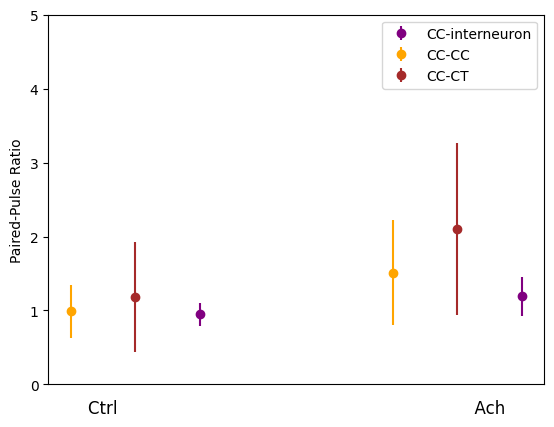

In [148]:
x2=[1.2,1.7]
e=[1.2,0.93,0.83,0.76,1.03]
f=[1.7,1.02,1.02,1.13,1.08]
e_mean=np.mean(e)
f_mean=np.mean(f)
e2=np.array([get_std_dev(e),get_std_dev(f)])
y2=np.array([e_mean,f_mean])
plt.errorbar(x2, y2, e2, linestyle='None', marker='o',color='purple',label='CC-interneuron')
y = np.array([0.99,1.51])
y1=np.array([1.187,2.099])
x= [1,1.5,] 
x1=[1.1,1.6]
e = np.array([0.36,0.71])
e1=np.array([0.743,1.161])
plt.errorbar(x, y, e, linestyle='None', marker='o',color='orange',label='CC-CC')
plt.errorbar(x1, y1, e1, linestyle='None', marker='o',color='brown',label='CC-CT')
plt.ylim(0,5)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
plt.title('Ctrl                                                                    Ach', y=-0.1)

plt.ylabel('Paired-Pulse Ratio')
plt.legend()
plt.show()  

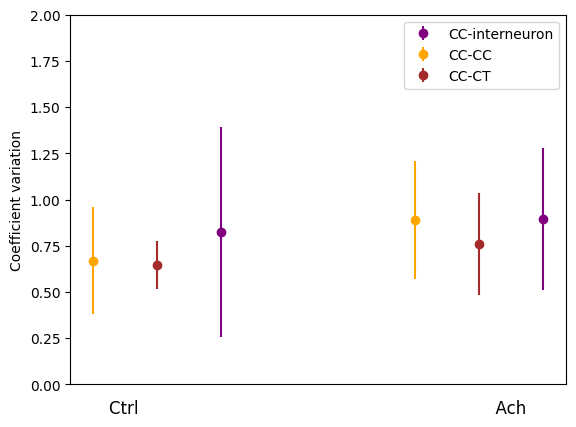

In [149]:
x2=[1.2,1.7]
e=[0.865,0.480,0.746,0.416,0.401,2.038]
f=[0.866,0.472,1.212,1.042,0.354,1.434]
e_mean=np.mean(e)
f_mean=np.mean(f)
e2=np.array([get_std_dev(e),get_std_dev(f)])
y2=np.array([e_mean,f_mean])
plt.errorbar(x2, y2, e2, linestyle='None', marker='o',color='purple',label='CC-interneuron')
y = np.array([0.67,0.89])
y1=np.array([0.646,0.760])
x= [1,1.5,] 
x1=[1.1,1.6]
e = np.array([0.29,0.32])
e1=np.array([0.129,0.277])

plt.errorbar(x, y, e, linestyle='None', marker='o',color='orange',label='CC-CC')
plt.errorbar(x1, y1, e1, linestyle='None', marker='o',color='brown',label='CC-CT')
plt.ylim(0,2)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
plt.title('Ctrl                                                                    Ach', y=-0.1)

plt.ylabel('Coefficient variation')
plt.legend()
plt.show()  

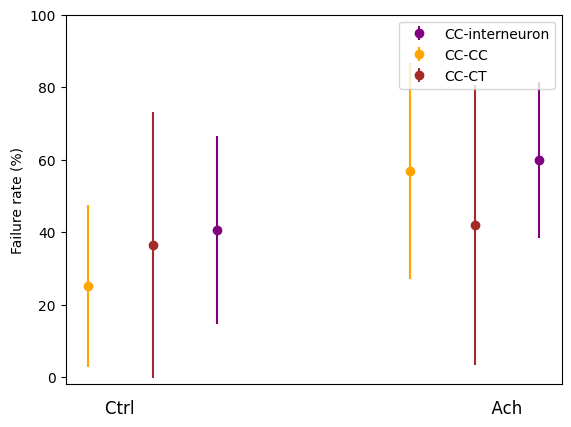

In [150]:
x2=[1.2,1.7]
e=[54.8,26.7,6.7,74.3]
f=[75,60,25,80]
e_mean=np.mean(e)
f_mean=np.mean(f)
e2=np.array([get_std_dev(e),get_std_dev(f)])
y2=np.array([e_mean,f_mean])
plt.errorbar(x2, y2, e2, linestyle='None', marker='o',color='purple',label='CC-interneuron')
y = np.array([25.21,56.82])
y1=np.array([36.500,42.011])
x= [1,1.5,] 
x1=[1.1,1.6]
e = np.array([22.33,29.80])
e1=np.array([36.773,38.578])
plt.errorbar(x, y, e, linestyle='None', marker='o',color='orange',label='CC-CC')
plt.errorbar(x1, y1, e1, linestyle='None', marker='o',color='brown',label='CC-CT')
plt.ylim(-2,100)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
plt.title('Ctrl                                                                    Ach', y=-0.1)

plt.ylabel('Failure rate (%)')
plt.legend()
plt.show()  